In [180]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [7]:
#FIRST TASK
#Завантажити дані, вивести назви колонок і розмір датасета

In [2]:
dataset = pd.read_csv('Phishing_Legitimate_full.csv')
dataset.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [9]:
dataset.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [8]:
dataset.shape

(10000, 50)

In [10]:
#SECOND TASK
#Опрацювати пропуски (по можливості заповнити їх або видалити)

In [14]:
dataset.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [15]:
#already without NULLs

In [17]:
#FOURTH TASK (спочатку нормалізую дані)
#Нормалізувати дані

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [28]:
Leb_Enc = preprocessing.LabelEncoder()
dataset = dataset.drop(columns=['id'])
dataset['PctExtHyperlinks'] = Leb_Enc.fit_transform(dataset['PctExtHyperlinks'])
dataset['PctExtResourceUrls'] = Leb_Enc.fit_transform(dataset['PctExtResourceUrls'])
dataset['PctNullSelfRedirectHyperlinks'] = Leb_Enc.fit_transform(dataset['PctNullSelfRedirectHyperlinks'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  float64
 1   SubdomainLevel                      10000 non-null  float64
 2   PathLevel                           10000 non-null  float64
 3   UrlLength                           10000 non-null  float64
 4   NumDash                             10000 non-null  float64
 5   NumDashInHostname                   10000 non-null  float64
 6   AtSymbol                            10000 non-null  float64
 7   TildeSymbol                         10000 non-null  float64
 8   NumUnderscore                       10000 non-null  float64
 9   NumPercent                          10000 non-null  float64
 10  NumQueryComponents                  10000 non-null  float64
 11  NumAmpersand                        10000 

In [29]:
scal = preprocessing.MinMaxScaler()
names = dataset.columns
dataset_scaler = scal.fit_transform(dataset)
dataset = pd.DataFrame(dataset_scaler, columns=names)
dataset.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,0.1,0.071429,0.277778,0.248963,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,1.0,1.0,0.5,1.0,1.0,0.0,1.0,1.0
1,0.1,0.071429,0.166667,0.547718,0.000000,0.0,0.0,0.0,0.111111,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,0.1,0.071429,0.111111,0.190871,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.5,0.0,1.0,0.0,0.5,1.0
3,0.1,0.071429,0.333333,0.278008,0.018182,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
4,0.1,0.000000,0.222222,0.141079,0.000000,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.0,1.0


In [30]:
#THIRD TASK
#Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції
#ознак між собою і з цільовою змінною (розміткою); побудувати гістограми
#розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато
#обмежитися декількома)

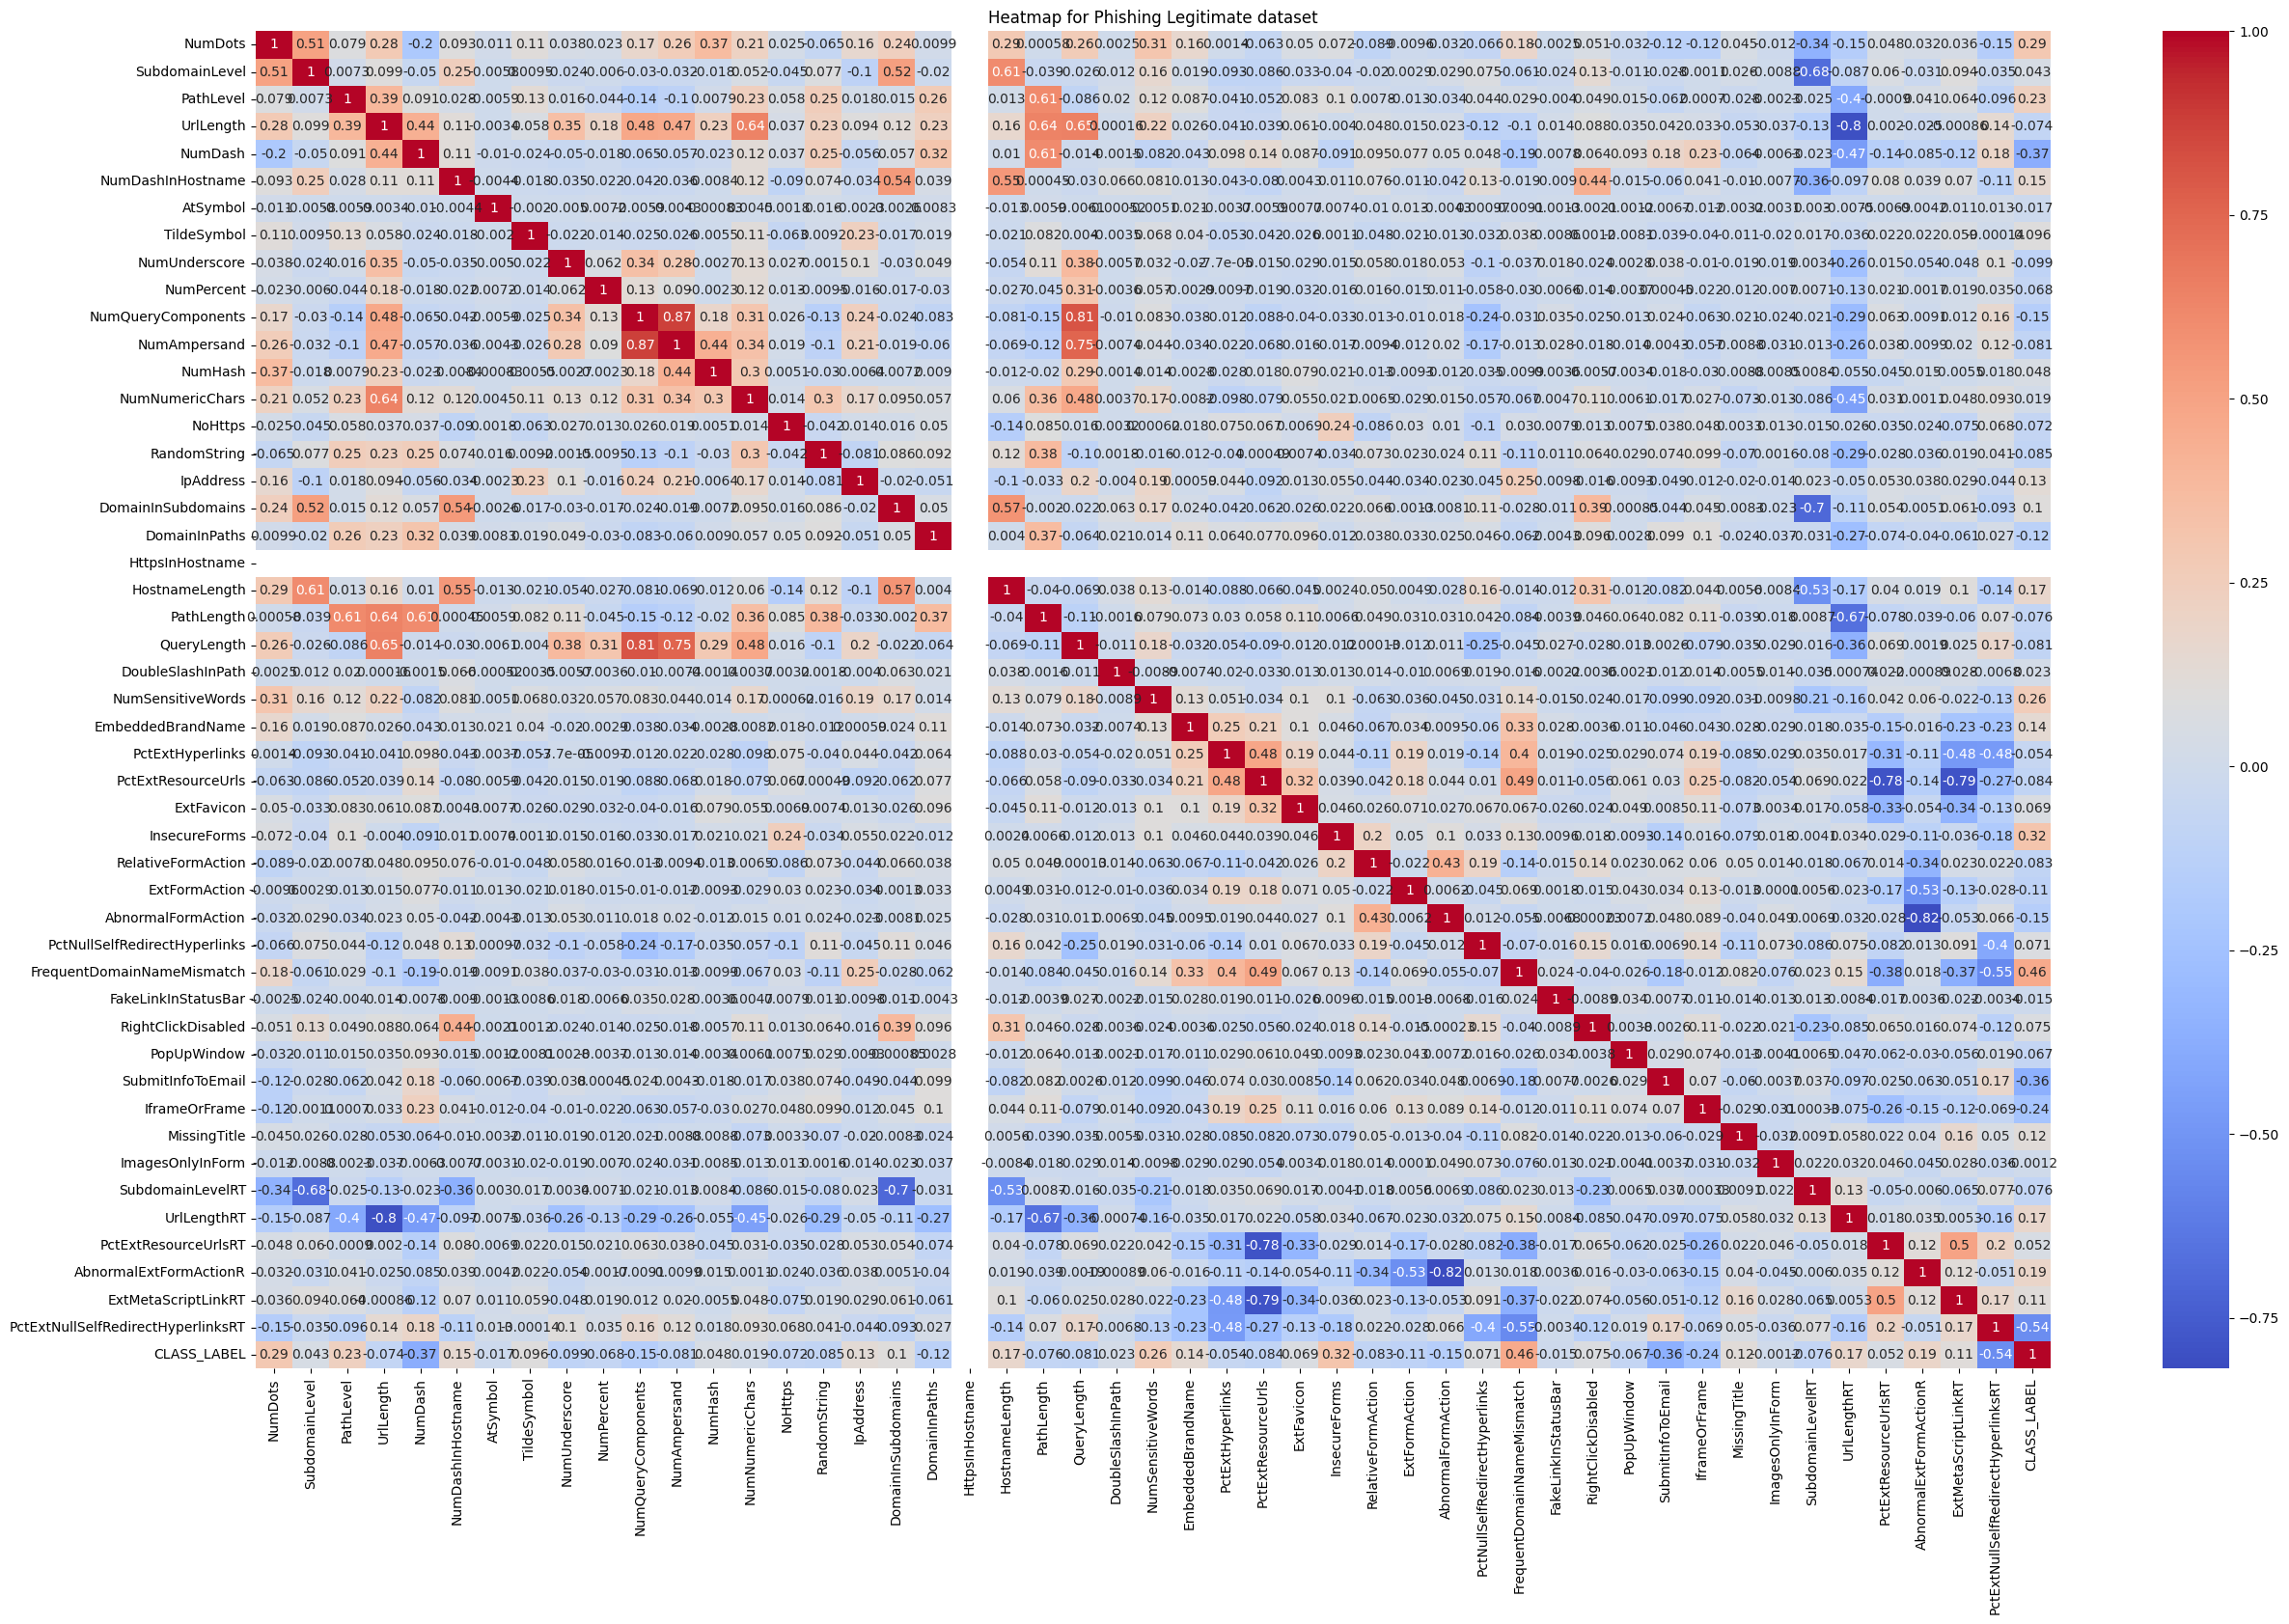

In [31]:
plt.figure(figsize=(30, 18))
sns.heatmap(dataset.corr(),  cmap='coolwarm', annot=True)
plt.title('Heatmap for Phishing Legitimate dataset')
plt.show()

In [32]:
print(dataset.keys())

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT

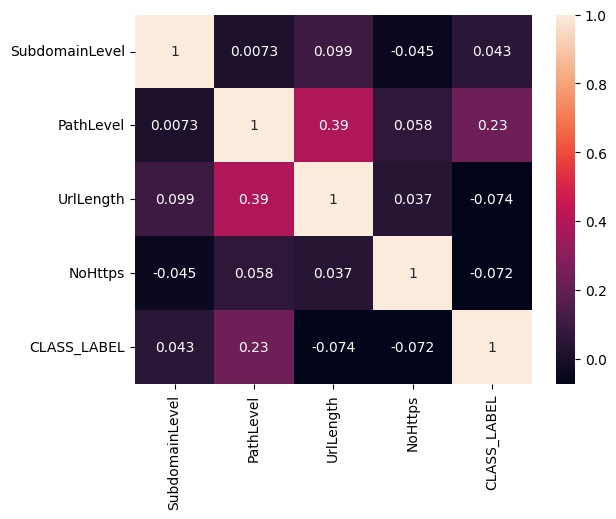

In [34]:
corr_matr = np.corrcoef([dataset['SubdomainLevel'], dataset['PathLevel'],
                           dataset['UrlLength'], dataset['NoHttps'], dataset['CLASS_LABEL']])

sns.heatmap(corr_matr, annot = True,
            xticklabels=['SubdomainLevel', 'PathLevel', 'UrlLength', 'NoHttps', 'CLASS_LABEL'],
            yticklabels=['SubdomainLevel', 'PathLevel', 'UrlLength', 'NoHttps', 'CLASS_LABEL'])

plt.show()

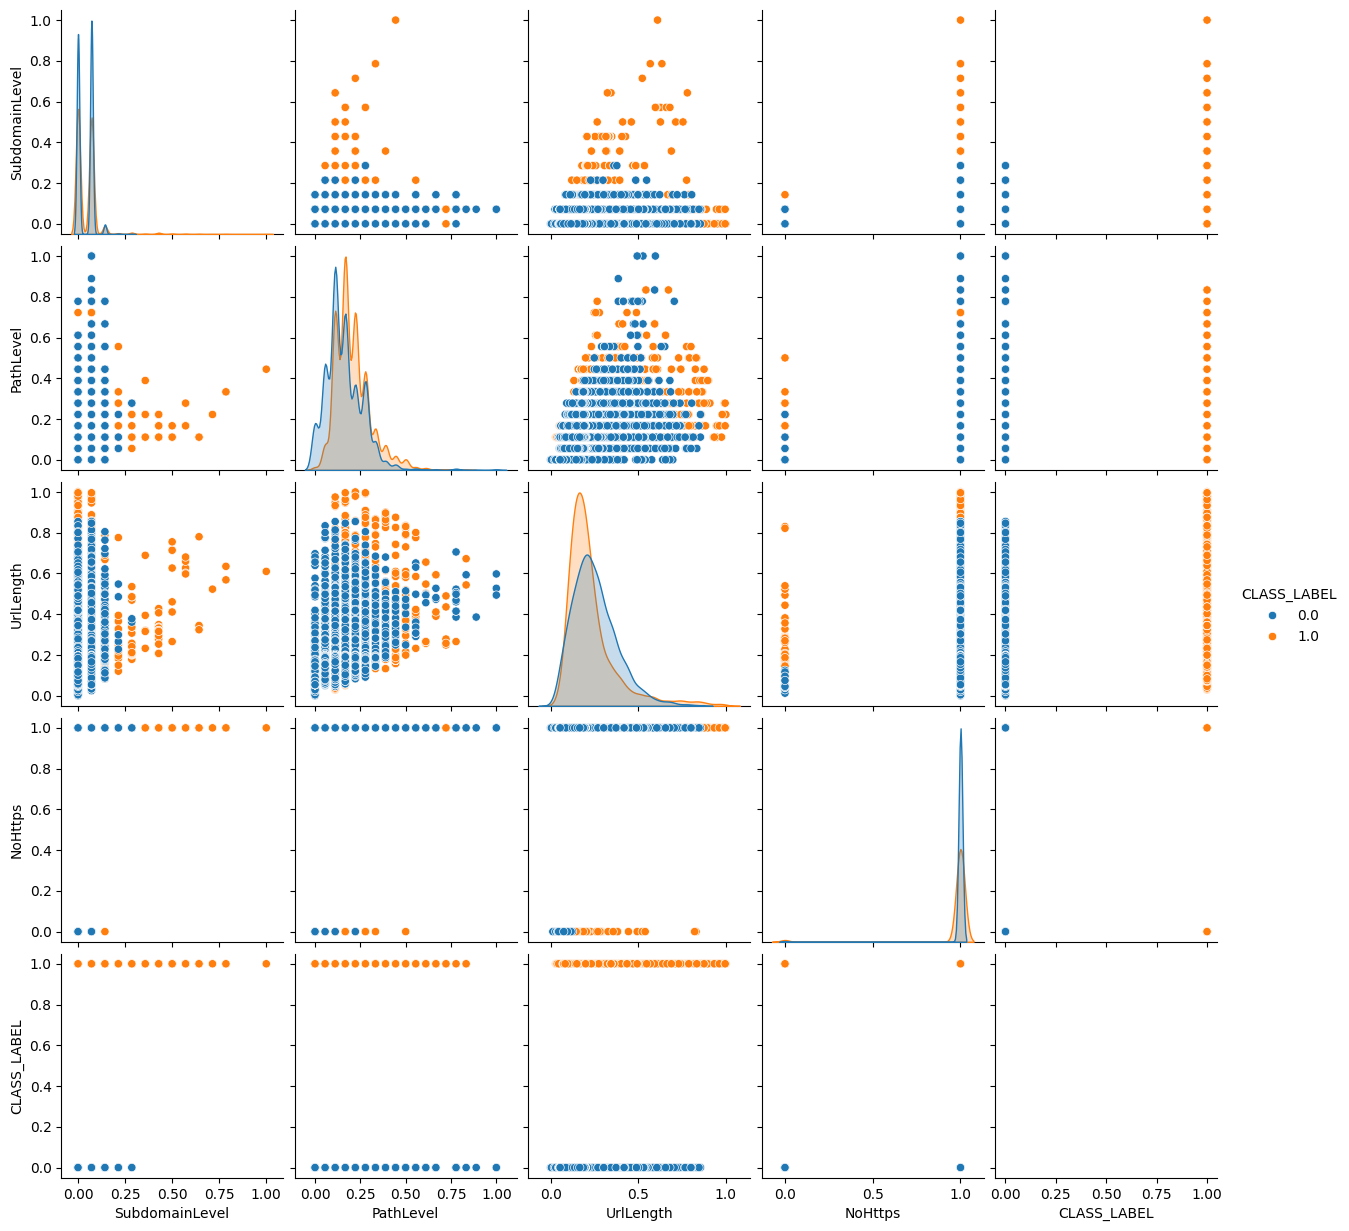

In [36]:
sns.pairplot(dataset, hue = 'CLASS_LABEL',
             x_vars=['SubdomainLevel', 'PathLevel', 'UrlLength', 'NoHttps', 'CLASS_LABEL'],
             y_vars=['SubdomainLevel', 'PathLevel', 'UrlLength', 'NoHttps', 'CLASS_LABEL'])
plt.show()

In [48]:
InsecureForms_i = dataset.columns.get_loc('SubdomainLevel')
feature_names = []
dataset_corr = dataset.corr().loc['SubdomainLevel']

sort_i_s = sorted(range(len(dataset_corr)),
                  key = lambda k: abs(dataset_corr[k]), reverse = True)

print(sort_i_s)
feature_i_d = sort_i_s[1:6]

for item in feature_i_d:
    feature_names.append(dataset.columns[item])

[1, 19, 42, 20, 17, 0, 5, 24, 36, 16, 3, 46, 26, 43, 27, 15, 33, 34, 44, 13, 4, 14, 48, 29, 21, 47, 28, 11, 45, 10, 32, 38, 40, 22, 35, 8, 30, 18, 25, 12, 23, 37, 7, 41, 2, 9, 6, 31, 39]


In [49]:
feature_names

['HttpsInHostname',
 'SubdomainLevelRT',
 'HostnameLength',
 'DomainInSubdomains',
 'NumDots']

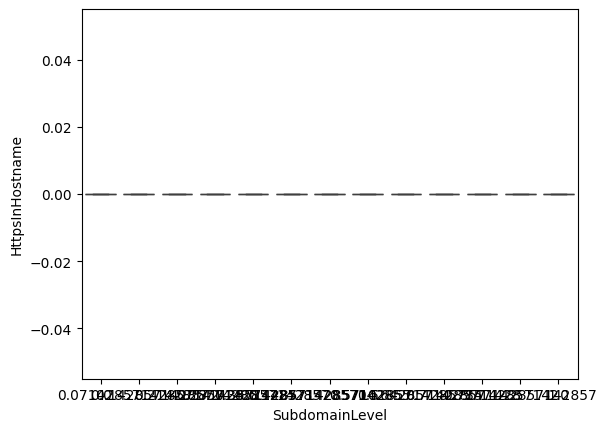

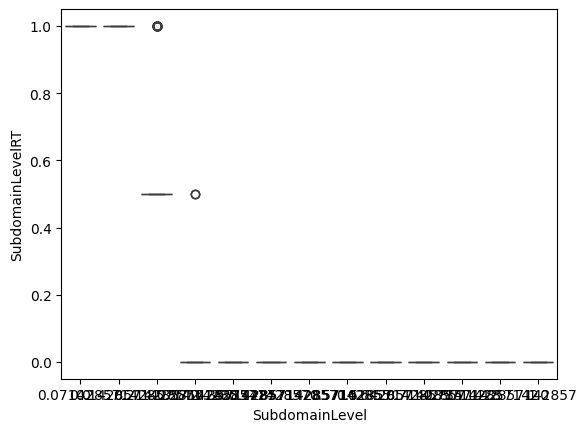

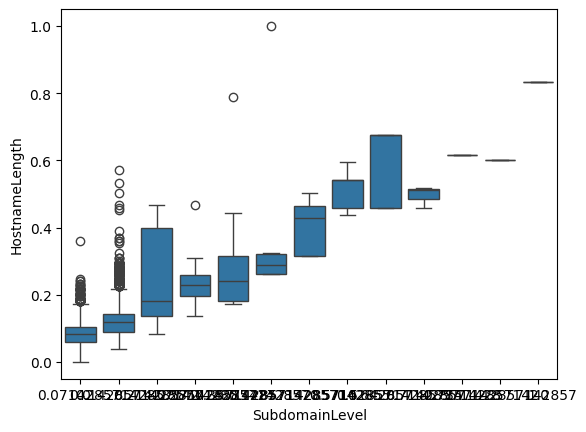

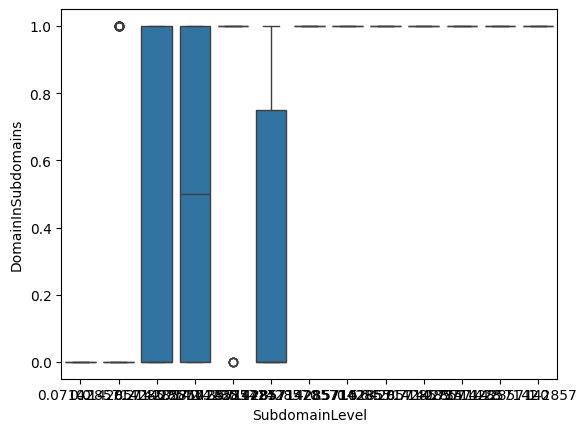

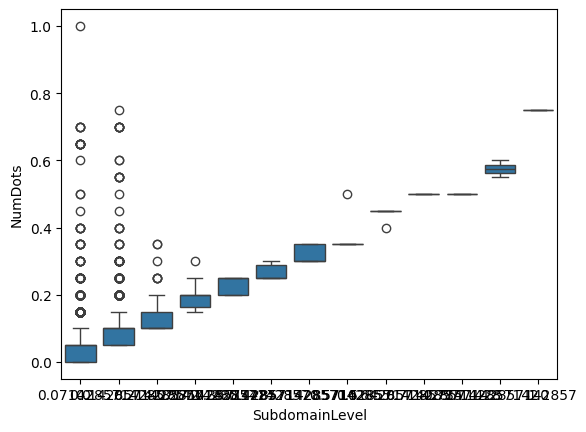

In [50]:
for i in range(len(feature_names)):
    fig = plt.figure()
    ax = sns.boxplot(x = 'SubdomainLevel', y = feature_names[i], data = dataset)

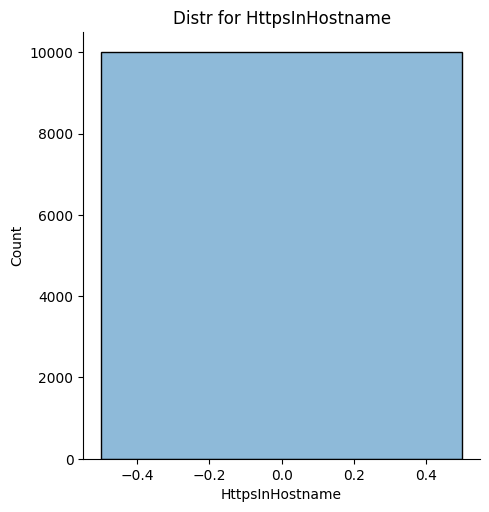

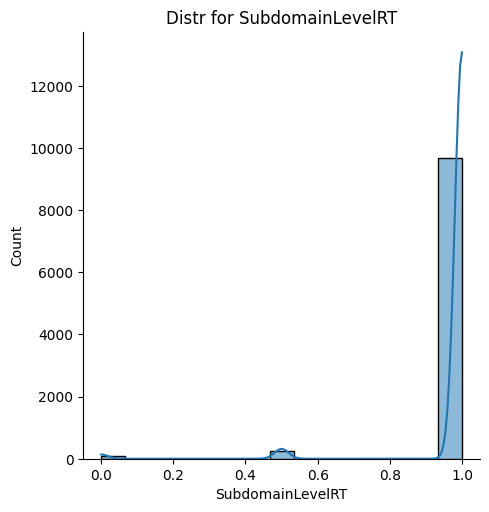

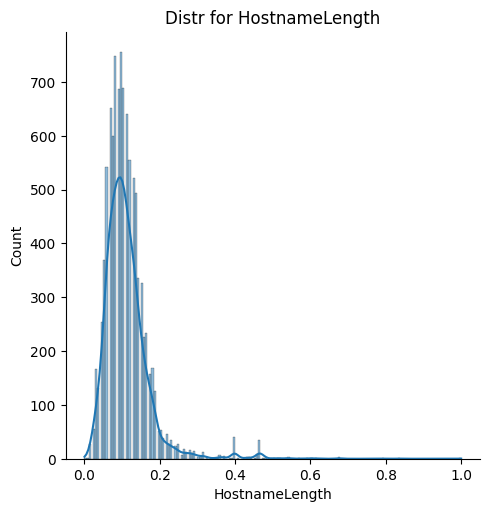

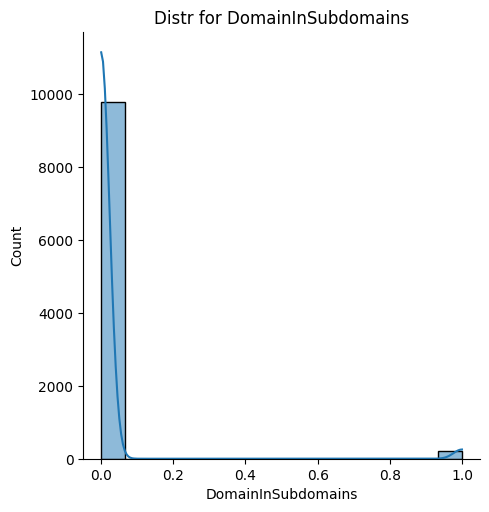

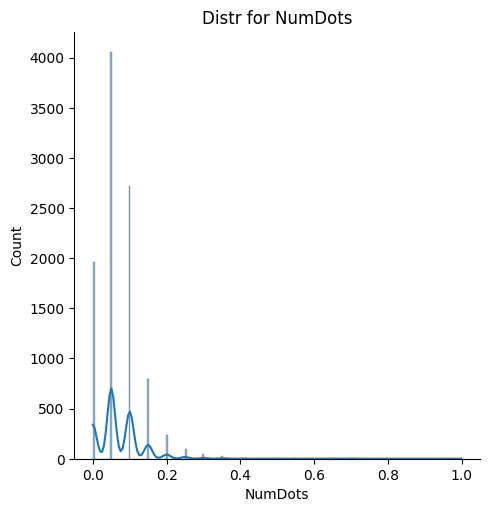

In [51]:
for i in range(len(feature_names)):
    sns.displot(dataset[feature_names[i]], kde = True)
    plt.title(f'Distr for {feature_names[i]}')
    plt.show()

In [92]:
#FIFTH TASK
#Провести навчання наступних класифікаторів:
#kNN
#дерево ухвалення рішень
#SVM
#Random Forest
#AdaBoost

In [94]:
file = "Phishing_Legitimate_full.csv"
df = pd.read_csv(file)
df = pd.DataFrame(df)
df.drop('id', inplace=True, axis=1)
scaler = preprocessing.MinMaxScaler()
scaler_names = df.columns
d_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d_df, columns = scaler_names)
scaled_df.head(100)
X = scaled_df.drop('CLASS_LABEL', axis=1)
y = scaled_df['CLASS_LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Classification report

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       970
         1.0       0.95      0.95      0.95      1030

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Confusion matrix

[[920  50]
 [ 56 974]]
Heatmap



<Axes: >

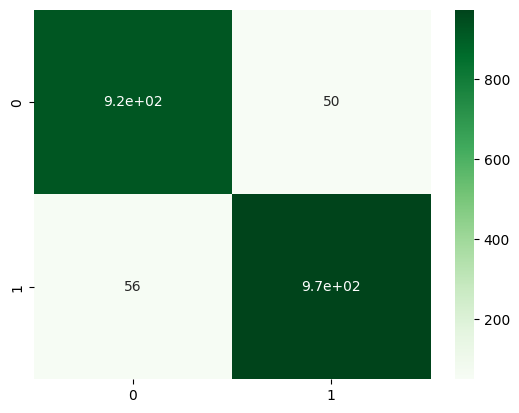

In [95]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

#predicting test set results
y_pred = knn.predict(X_test)

print("Classification report\n")
print(classification_report(y_test,y_pred))
print("Confusion matrix\n")
print(confusion_matrix(y_test, y_pred))
print("Heatmap\n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap = 'Greens')

In [159]:
df = pd.read_csv(file)
df

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [160]:
df.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [161]:
X = df.drop(['id', 'CLASS_LABEL', 'SubdomainLevel'], axis = 1)
y = df['SubdomainLevel']
set(y) ## labels

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14}

In [162]:
print(type(X), type(y))
print(X.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(10000, 47) (10000,)


In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(type(X), type(y))
print(X_train.shape, y_train.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(8000, 47) (8000,)


In [164]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [165]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       933
           1       0.84      0.80      0.82       990
           2       0.90      0.92      0.91        59
           3       1.00      0.40      0.57         5
           4       0.62      1.00      0.77         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1

    accuracy                           0.82      2000
   macro avg       0.72      0.70      0.69      2000
weighted avg       0.82      0.82      0.82      2000

[[786 146   1   0   0   0   0   0   0   0]
 [196 789   5   0   0   0   0   0   0   0]
 [  1   4  54   0   0   0   0   0   0   0]
 [  0   0   0   2   3   0   0   0   0   0]
 [  0   0   0   0   5   0   0   0   0   0]
 [  0   0   0   0   0   2 

In [173]:
#SVM

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [175]:
df = pd.read_csv(file)
df.drop('id', inplace=True, axis=1)
X = df.drop(['CLASS_LABEL'], axis=1)
y = df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [176]:
columns = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns = [columns])
X_test = pd.DataFrame(X_test, columns = [columns])

In [177]:
svm_svc = svm.SVC(C = 10, gamma = 0.1, kernel = "linear")
svm_svc.fit(X_train, y_train)
y_predict = svm_svc.predict(X_test)

print("Classification report\n")
print(classification_report(y_test, y_predict))
print("Confusion matrix\n")
print(confusion_matrix(y_test, y_predict))

Classification report

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1012
           1       0.92      0.94      0.93       988

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Confusion matrix

[[936  76]
 [ 55 933]]


In [178]:
svm_svc = svm.SVC(C = 10, gamma = 0.1, kernel = "sigmoid")
svm_svc.fit(X_train, y_train)
y_predict = svm_svc.predict(X_test)

print("Classification report\n")
print(classification_report(y_test, y_predict))
print("Confusion matrix\n")
print(confusion_matrix(y_test, y_predict))

Classification report

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1012
           1       0.77      0.77      0.77       988

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000

Confusion matrix

[[787 225]
 [227 761]]


In [179]:
svm_svc = svm.SVC(C = 10, gamma = 0.1, kernel = "sigmoid")
svm_svc.fit(X_train, y_train)
y_predict = svm_svc.predict(X_test)

print("Classification report\n")
print(classification_report(y_test, y_predict))
print("Confusion matrix\n")
print(confusion_matrix(y_test, y_predict))

Classification report

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1012
           1       0.77      0.77      0.77       988

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000

Confusion matrix

[[787 225]
 [227 761]]


In [181]:
random_forest = RandomForestClassifier(random_state=42)

In [182]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [183]:
y_pred = random_forest.predict(X_test)

In [185]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1012
           1       0.97      0.98      0.98       988

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

[[986  26]
 [ 15 973]]
